# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

#My project
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

**1. I have chosen the census data set.  
2. I will be analyzing how similar different individulas are to each other, based on income, education, and age. There is no label since this is an unsupervised learning problem.  
3. This is an unsupervised learning problem using clustering and a K-means algorithm. This is a multi-class classification problem.   
4. My features are age, hours-per-week, income_<=50k, income_>50k, Less than highschool, highschool or more.   
5. This could be used to provide insights into natural groupings of indivduals/consumers (e.g. to help chose which group to advertise to) by analyzing the socio-economnic classes within the population. If there is a correlation with income and another column, then advisters know to use that column to advertise to people who typically have more money to spend.**

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
#Display basic information about the dataset
print(df.shape)
print(df.columns)

(32561, 15)
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_binary'],
      dtype='object')


In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32399.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32236.000000
mean,38.589216,1.897784e+05,10.080679,615.907773,87.303830,40.450428
std,13.647862,1.055500e+05,2.572720,2420.191974,402.960219,12.353748
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,14084.000000,4356.000000,99.000000


In [5]:
#Check for missing values
print(df.isnull().sum())

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64


In [6]:
#Drop the rows that have too many missing values and don't add value to our model
df.drop(columns=['workclass', 'occupation', 'native-country'], inplace=True)

print(df.isnull().sum())

age               162
fnlwgt              0
education           0
education-num       0
marital-status      0
relationship        0
race                0
sex_selfID          0
capital-gain        0
capital-loss        0
hours-per-week    325
income_binary       0
dtype: int64


In [7]:
# Calculate the mean of the reamining missing values
mean_age = np.nanmean(df['age'])
mean_hours_per_week = np.nanmean(df['hours-per-week'])

# Fill missing values in the 'age' and 'hours_per_week' columns with the calculated means
df['age'].fillna(mean_age, inplace=True)
df['hours-per-week'].fillna(mean_hours_per_week, inplace=True)

# Check for any remaining missing values
print(df.isnull().sum())

age               0
fnlwgt            0
education         0
education-num     0
marital-status    0
relationship      0
race              0
sex_selfID        0
capital-gain      0
capital-loss      0
hours-per-week    0
income_binary     0
dtype: int64


Now, I want to see the distribution of education levels to see if we could group them into categories

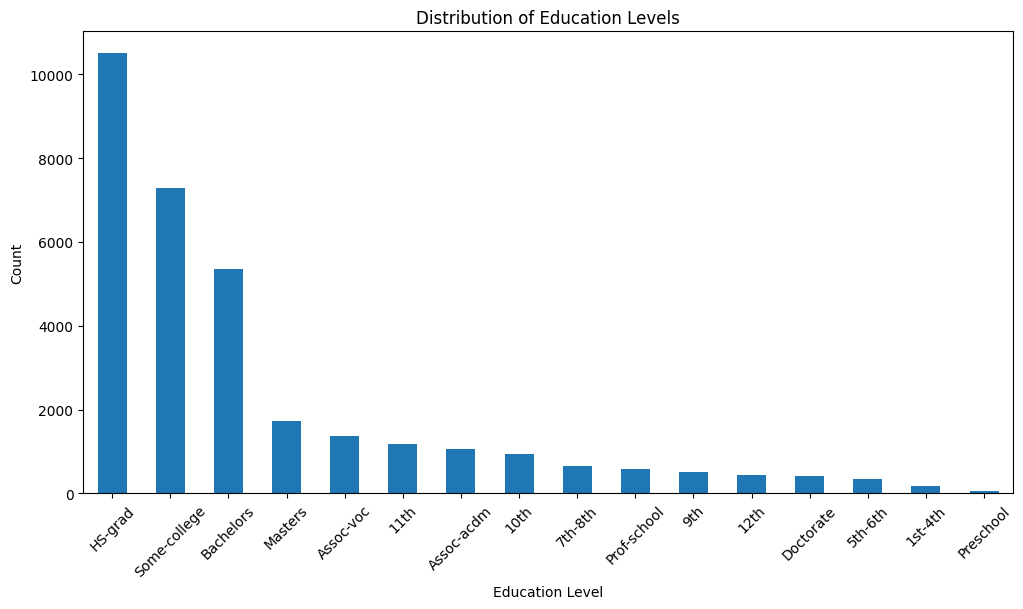

In [8]:
# Check plot distribution of education levels 
plt.figure(figsize=(12, 6))
df['education'].value_counts().plot(kind='bar')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Considering the education data distribution, we can combine the education values into two categories: 'High School or More' and 'Less than High School'

In [9]:
# Define the two new variables
df['Less than Highschool'] = df['education'].apply(lambda x: x if x in ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th'] else None)
df['High School or More'] = df['education'].apply(lambda x: x if x in ['HS-grad', 'Some-college', 'Assoc-voc', 'Prof-school', 'Assoc-acdm', 'Bachelors', 'Masters', 'Doctorate'] else None)

# Drop the original education column
df.drop(columns=['education'], inplace=True)

# Print the DataFrame columns to confirm the changes
print(df.columns) 

Index(['age', 'fnlwgt', 'education-num', 'marital-status', 'relationship',
       'race', 'sex_selfID', 'capital-gain', 'capital-loss', 'hours-per-week',
       'income_binary', 'Less than Highschool', 'High School or More'],
      dtype='object')


I was able to create a binary categorization of education levels, which wil simpilfy the analysis and reveal clearer patterns. Now, let's convert the new education categories and the other categorical values to binary to normalize later.

In [10]:
# Binary encoding for categorical values
df['income_<=50K'] = (df['income_binary'] == '<=50K').astype(int)
df['income_>50K'] = (df['income_binary'] == '>50K').astype(int)
df['LTH_encoded'] = df['Less than Highschool'].notna().astype(int)
df['HSPlus_encoded'] = df['High School or More'].notna().astype(int)

# Drop intermediate columns after encoding
df.drop(columns=['Less than Highschool', 'High School or More', 'income_binary'], inplace=True)

In [11]:
#Normalize the numerical columns
scaler = StandardScaler()
df_to_scale = df.select_dtypes([np.float64, np.int64]) #Ensures we get float and int
transformed_data = scaler.fit_transform(df_to_scale)
df_scaled = pd.DataFrame(transformed_data, columns = df_to_scale.columns, index = df_to_scale.index)

df_combined = pd.concat([df_scaled, df.drop(columns=df_to_scale.columns)], axis=1)

print(df_combined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   fnlwgt          32561 non-null  float64
 2   education-num   32561 non-null  float64
 3   capital-gain    32561 non-null  float64
 4   capital-loss    32561 non-null  float64
 5   hours-per-week  32561 non-null  float64
 6   income_<=50K    32561 non-null  float64
 7   income_>50K     32561 non-null  float64
 8   LTH_encoded     32561 non-null  float64
 9   HSPlus_encoded  32561 non-null  float64
 10  marital-status  32561 non-null  object 
 11  relationship    32561 non-null  object 
 12  race            32561 non-null  object 
 13  sex_selfID      32561 non-null  object 
dtypes: float64(10), object(4)
memory usage: 3.5+ MB
None


Alright, the data looks better prepared for clustering. Now, since our goal is to focus on grouping people by income and education, let's pick the best features for this model.

In [12]:
#Select features for clustering
features = ['income_<=50K', 'income_>50K', 'age', 'LTH_encoded', 'HSPlus_encoded', 'hours-per-week']

df_selected = df_combined[features]

### Visualizing the Data

The df_selected DataFrame contains, for each person listed, a group of six numerical features. We can think of each person being defined by this group of features. Therefore, let's visualize the data using a seaborn heatmap() function to make a heatmap of df_selected.

<AxesSubplot: >

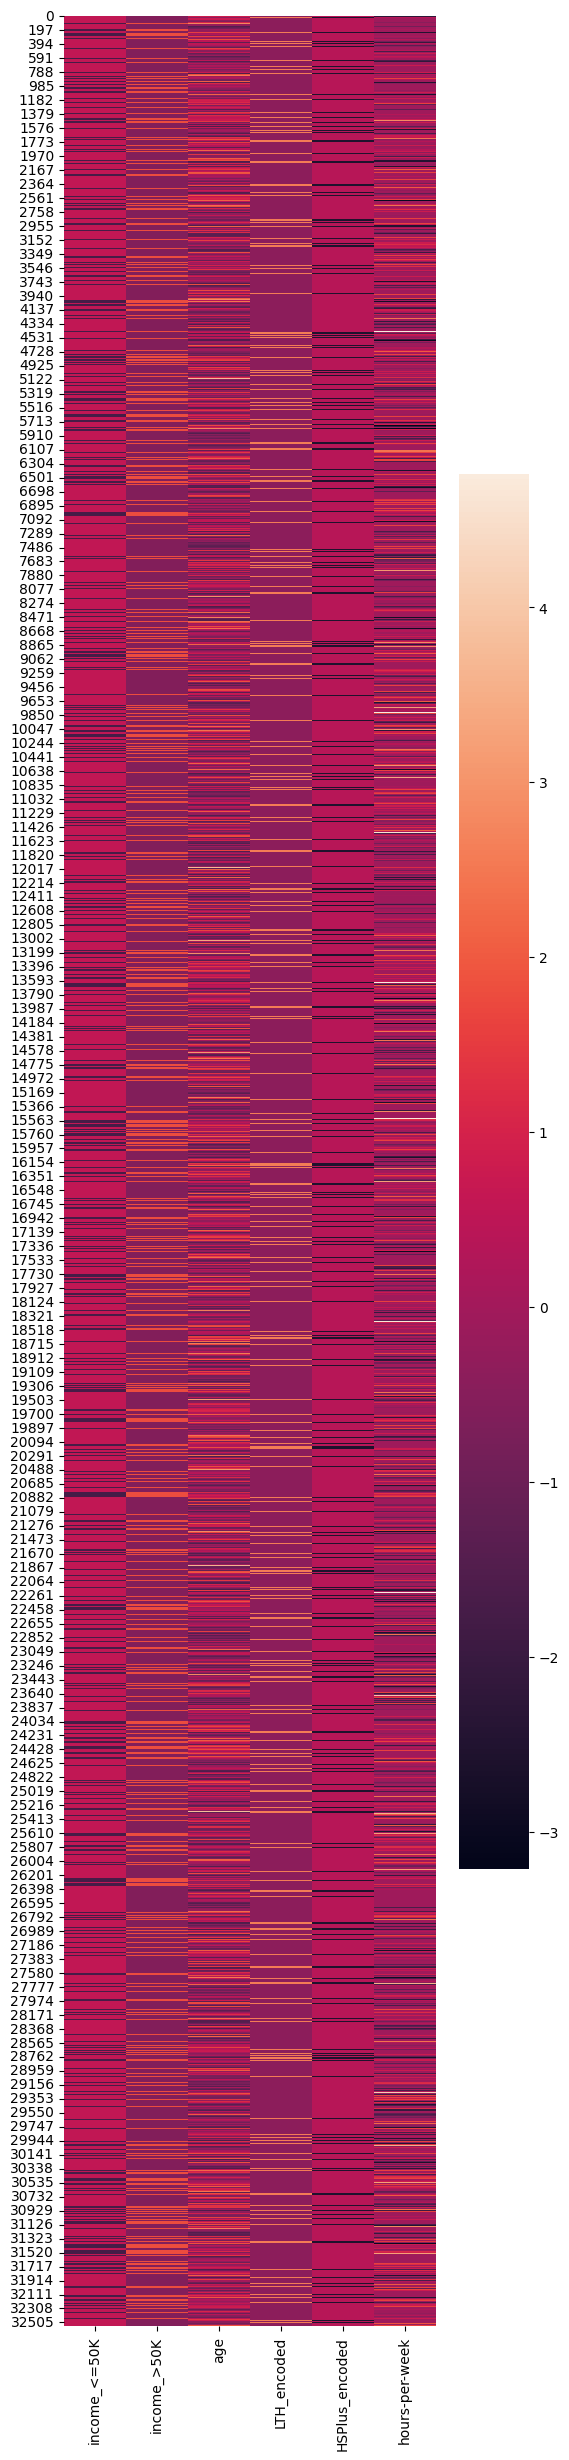

In [13]:
plt.figure(figsize = (6,30))
sns.heatmap(df_selected)


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

<b>Question 1:   
* No, I have the same features list with different names: income_<=50k, income_>50k, age, LTH_encoded, HSPlus_endoded, hours-per-week.
* I removed any features with a high value of missing data or non-numeric features.  

<b>Question 2:
* Handling Missing Values: 
    * Imputation: Replaced missing values with the mean for numerical features.
    * Deletion: Columns with excessive missing values were removed.
* Feature Scaling:
    * Normalization: scaled features to a range between 0 and 1  
* Encoding Categorical Variables:
    * One-Hot Encoding: converted categorical features into binary vectors to be used in the clustering model
* Feature Selection:
    * Removed features that did not contribute much to the model.
 
<b>Question 3:  
* K-Means Clustering: Used to identify distinct clusters within the data based on selected features. K-means is suitable for partitioning data into k distinct groups.

<b>Question 4: 
* Model Building:
    * Clustering with K-means: Use K-means to cluster the data into a predefined number of clusters (e.g., 3 clusters).
    * Fitting the Model: Apply the K-means algorithm to the training data to partition it into clusters based on feature similarity.
* Model Evaluation:
    * Examine the characteristics of each cluster to interpret and validate the clustering results.
    * Used Silhouette and Inertia score to determine model performance
* Improve the model:
    * Feature Engineering: Experiment with adding or modifying features to improve cluster separation.
    * Parameter Tuning: Adjust the number of clusters (k) to find the optimal number that best captures the underlying structure of the data (in this project I used the Elow Method)
    * Advanced Techniques (Future Work):
        * Random Forest Models: Consider building classification models for each cluster to predict the target variable within each cluster. Use GridSearchCV for hyperparameter tuning and model selection.
        * Integration with Other Models: Combine clustering results with other machine learning models to enhance predictive performance and gain deeper insights.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

Applied at the start of the notebook.

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

### Performing KMeans Clustering and Analyzing the Results

To find the best number of clusters, we are going to utilize the elbow method to find the most optimal number to work with. It's called the elbow method because the graph will look like an elbow where the best number will be where the elbow forms. 
  *Note: Elbow Method code was altered to suit model from Stack Overflow.*  

Text(0.5, 1.0, 'Elbow Curve')

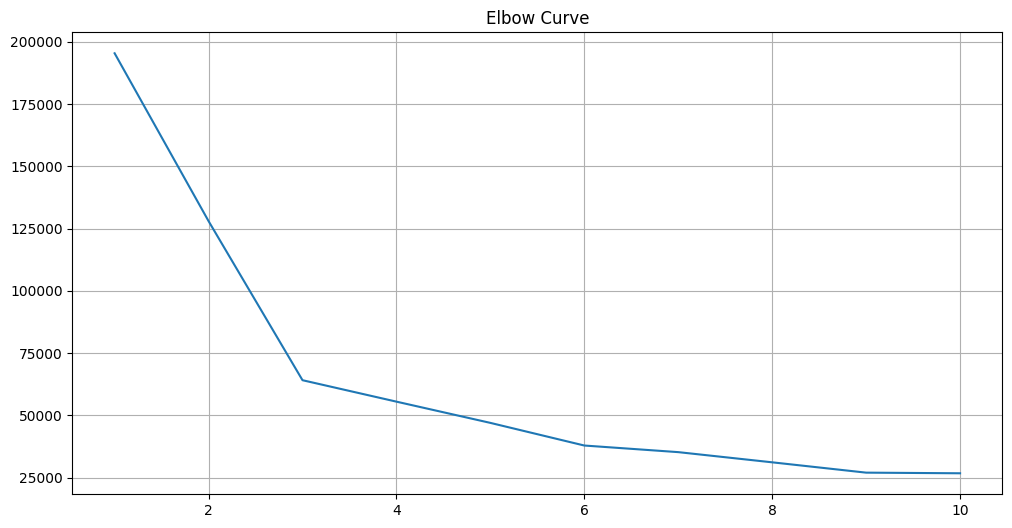

In [14]:
# Elbow Method
distortions = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_selected)
    distortions.append(kmeans.inertia_)

#Plotting Elbow Method
fig = plt.figure(figsize=(12,6))
plt.plot(range(1,11), distortions)
plt.grid(True)
plt.title('Elbow Curve')


Given the elbow curve, I have to decided to choose 3 for my model.

In [15]:
kcluster = KMeans(n_clusters=3, random_state=42)
kcluster.fit(df_selected)

KMeans(n_clusters=3, random_state=42)

In [16]:
#List of feature names used for clustering (numerical)
numerical_features = ['income_<=50K', 'income_>50K', 'age', 'LTH_encoded', 'HSPlus_encoded', 'hours-per-week']

In [17]:
#Add the cluster labels to the original DataFrame
df_clustered = df.copy()
df_clustered['klabel'] = kcluster.labels_

#Add the cluster labels to the selected DataFrame
df_selected_clustered = df_selected.copy()
df_selected_clustered['klabel'] = kcluster.labels_

#Print the head of the DataFrames to verify the cluster labels
print(df_clustered.head())
print(df_selected_clustered.head())

    age  fnlwgt  education-num      marital-status   relationship   race  \
0  39.0   77516             13       Never-married  Not-in-family  White   
1  50.0   83311             13  Married-civ-spouse        Husband  White   
2  38.0  215646              9            Divorced  Not-in-family  White   
3  53.0  234721              7  Married-civ-spouse        Husband  Black   
4  28.0  338409             13  Married-civ-spouse           Wife  Black   

   sex_selfID  capital-gain  capital-loss  hours-per-week  income_<=50K  \
0  Non-Female          2174             0            40.0             1   
1  Non-Female             0             0            13.0             1   
2  Non-Female             0             0            40.0             1   
3  Non-Female             0             0            40.0             1   
4      Female             0             0            40.0             1   

   income_>50K  LTH_encoded  HSPlus_encoded  klabel  
0            0            0           

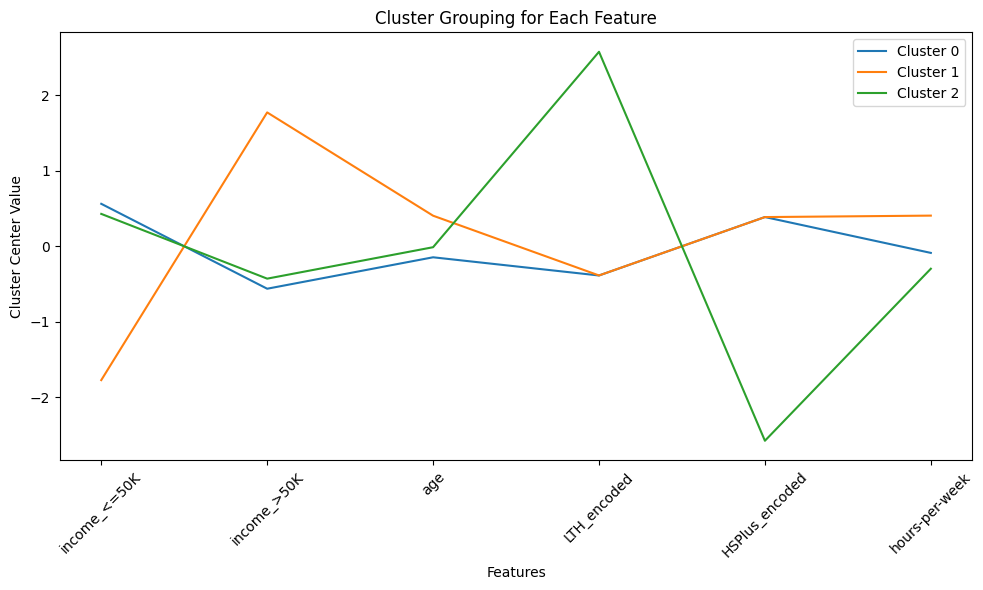

In [18]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
for i in range(kcluster.n_clusters):
    plt.plot(kcluster.cluster_centers_[i], label=f'Cluster {i}')

plt.xticks(range(len(numerical_features)), numerical_features, rotation=45)
plt.xlabel('Features')
plt.ylabel('Cluster Center Value')
plt.title('Cluster Grouping for Each Feature')
plt.legend()
plt.tight_layout()
plt.show()

According to this graph, the following descriptions could be gathered from the clusters:

**Cluster 0 (Blue line): Lower income, mixed education group (potential for growth)  
Cluster 1 (Orange line): Higher income, mixed education group (established professionals)  
Cluster 2 (Green line): Lower income, lower education group (potentially vulnerable)**  


Understanding these clusters can help in targeting specific groups for interventions, policies, or further analysis based on their demographic and socio-economic profiles. 

### Evaluation

In [19]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_selected, kcluster.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5833898637090399


The Silhouette Score ranges from -1 to 1, where the higher score indicates that clusters are well-separted and defined. A score of 0.583 suggests that the clusters are reasonably well-separated, with a good degree of cohesion within each cluster. This indicates that my clustering solution is effective, but there may be room for improvement, potentially through further fine-tuning.

In [20]:
inertia = kcluster.inertia_
print(f"Inertia: {inertia}")

Inertia: 64159.336059802496


Inertia measures the sum of squared distances from each point to its assigned cluster center (e.g. provides a measure of how tighly the clusters are packed. 

Together, these metrics suggest that my clustering model is performing well in terms of cluster separation and compactness, avoiding significant overfitting and underfitting. In other words, this current model suggests a balanced approach but highlights the potential need for further refinement and optinimzation. 

## Conclusion

The objective of this project was to analyze how individuals differ from each other based on socio-economic features such as age, income, education, and hours-per-week, using K-means clustering. The aim was to identify distinct groups within the census population that could provide insights for targeted marketing startegies, policy making, or X company reason.  

The K-means clustering algorithm identified three distinct clusters within the dataset. Each cluster represents a unique socio-economic group:

* Cluster 0: This cluster represents individuals with lower incomes and a mix of educational backgrounds, indicating potential for growth. This group includes people with varying levels of education but lower income levels, suggesting opportunities for economic development and career advancement.
* Cluster 1: This cluster consists of higher-income individuals with diverse educational backgrounds, identifying them as established professionals. This group is characterized by stable, higher-income roles and a mix of educational levels, making them a target for premium products and services.
* Cluster 2: This cluster encompasses individuals with lower incomes and lower education levels, highlighting a potentially vulnerable group. This group faces economic challenges and may benefit from targeted support and development programs.

The insights from this model are useful to provide actionable implications when advanced upon:  
* Cluster 0: Marketing strategies should focus on products and services that support economic growth and educational opportunities. Policy initiatives could include job training and education programs to help improve income levels and career prospects.
* Cluster 1: For this established professional group, marketing efforts can emphasize high-quality, premium offerings. Policies might focus on sustaining high levels of professional development and maintaining career stability.
* Cluster 2: This vulnerable group requires targeted support. Marketing strategies should include affordable options, while policies could aim at educational support and job creation to address economic vulnerabilities.

Although the clustering analysis has provided valuable insights, there is potential for further enhancement. Future work could include advancing the model with additional techniques such as Random Forests or other machine learning algorithms to refine predictions and provide deeper insights. The integration of these advanced models could improve the accuracy and applicability of the clustering results, offering more precise guidance for targeted strategies and policy-making - something I would have loved to have done within this project if time was on my side. 

Overall, this clustering analysis has offered a foundation for understanding socio-economic groupings within the population, with significant implications for marketing and policy strategies. Further advancements can build upon these findings to enhance their impact and effectiveness in the future. 